In [52]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import ML_functions ## a self-created script, known as ML_functions.py

In [53]:
data = pd.read_csv('multivariate.csv')
data = data.sort_values(by = "Label",ascending = False)
## Divide data into numerical data and label
status = pd.DataFrame(data["Label"])
data_df = pd.DataFrame(data.iloc[:,1:])
data_df.shape

(388, 337)

In [54]:
test = data_df[['P05154','P01375','P01019','Q9UNN8','Q9H4G4','Label']]

Remove top 12 depleted protein

In [55]:
data_df = ML_functions.remove_depletion_protein(data_df)
highcorr  = []
data_df,highcorr = ML_functions.remove_highcorr(data_df)
## Reinsert a protein (complement factor), because P02745,P02746,P02748 
# are found to be important features, but they are all referred to complement factor 
data_df.insert(2,'P02745',data['P02745'])

32 columns will be removed
48 genes are found to be strongly correlated
(388, 261)


In [61]:
data_df.values

array([[8.621682171, 8.583763269, 10.92591133, ..., 1.0, 1.0, 'Pre'],
       [11.83536856, 8.20708137, 10.6111603, ..., 1.0, 1.0, 'Pre'],
       [1.0, 9.468475974, 11.13756797, ..., 1.0, 1.0, 'Pre'],
       ...,
       [12.52639518, 9.121094755, 10.50774139, ..., 1.0, 1.0,
        'Active Surveillance'],
       [7.743628125, 8.690626795, 10.09751591, ..., 1.0, 1.0,
        'Active Surveillance'],
       [13.46183803, 8.705794171, 10.48730995, ..., 1.0, 1.0,
        'Active Surveillance']], dtype=object)

In [66]:
data_df[data_df['Label'] == 'No Cancer']

,B9A064,O00187,P02745,O00533,O14786,O14791,O15230,O43866,O76074,O95497,...,P32121,Q15910,Q6UX71,Q96EE4,P27487,Q13822,P04899,Q9UNN8,P30307,Label
53,9.704181,8.218228,10.851762,8.967925,1.000000,10.073981,1.000000,8.328552,1.000000,9.145040,...,8.963486,1.000000,1.000000,1.0,7.718033,9.304089,1.000000,9.120589,1.000000,No Cancer
200,14.996437,8.571922,8.606699,8.047027,1.000000,10.171815,1.000000,12.703154,9.296472,7.940511,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,No Cancer
227,16.313284,8.657729,9.500951,8.890966,1.000000,10.749140,1.000000,10.275325,10.565264,7.193238,...,1.000000,10.256695,7.747042,1.0,1.000000,8.500014,7.827730,1.000000,1.000000,No Cancer
201,13.019535,8.701755,10.196623,8.839047,8.537262,10.290156,1.000000,9.762460,9.642349,6.072959,...,1.000000,1.000000,9.165232,1.0,1.000000,8.713709,1.000000,8.674137,1.000000,No Cancer
208,11.943903,7.098077,9.493263,8.345892,1.000000,9.612265,1.000000,9.162837,9.979264,7.098814,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,9.811100,No Cancer
300,11.666370,9.084989,10.621198,9.318277,8.231509,9.965693,10.817532,8.715126,10.063338,8.122593,...,1.000000,1.000000,1.000000,1.0,7.685913,1.000000,1.000000,9.144960,1.000000,No Cancer
274,9.955648,8.759162,10.420831,9.023082,1.000000,9.882159,1.000000,8.748780,1.000000,9.206186,...,1.000000,1.000000,8.417083,1.0,7.378649,8.641614,1.000000,1.000000,1.000000,No Cancer
293,9.089087,8.797004,10.154260,8.606420,1.000000,8.982160,10.404334,1.000000,1.000000,7.814710,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,No Cancer
349,12.255182,1.000000,8.001384,1.000000,1.000000,9.033150,1.000000,8.943553,11.130462,1.000000,...,1.000000,1.000000,8.448411,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,No Cancer
277,1.000000,8.374648,8.766456,1.000000,1.000000,9.495641,10.874620,8.815898,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,9.303148,No Cancer


Select important feature based on RF

In [26]:
RF_feature = ['P01375','P07996','P01019', 'P08185',
            'P02776','P05154','P27169','P02745']

#P19652

data_RF = data_df[RF_feature]

### Standarizaing data using StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler
x = data_RF.iloc[:]
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x)

(-1.1474212187491954e-15, 1.0)

In [28]:
##Let's convert the normalized features into a tabular format with the help of DataFrame.
normalised_data = pd.DataFrame(x,columns = RF_feature)
normalised_data.head()

,P01375,P07996,P01019,P08185,P02776,P05154,P27169,P02745
0,-0.462875,0.404761,-0.058699,-0.021186,0.277799,0.296996,-0.569323,1.195799
1,2.158931,0.025346,-0.635561,-0.512341,0.364480,0.530346,-0.614210,0.668946
2,-0.462875,0.451722,0.247032,1.447790,0.708670,-0.303955,-2.446271,1.550085
3,2.209858,-0.244899,-0.248844,0.146070,0.434685,0.682674,0.280469,0.893005
4,-0.462875,1.959129,0.732255,1.559393,0.863437,0.363443,1.983337,1.492408


### Run PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA_cancer = pca.fit_transform(x)

In [30]:
PCA_cancer_df = pd.DataFrame(data = PCA_cancer
             , columns = ['principal component 1', 'principal component 2'])
PCA_cancer_df.head()

,principal component 1,principal component 2
0,-0.367404,-0.729561
1,-0.014921,-0.512727
2,-0.634853,-1.538927
3,-0.930284,0.052974
4,-3.338327,-0.552207


In [31]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.37621955 0.19476883]


<Figure size 432x288 with 0 Axes>

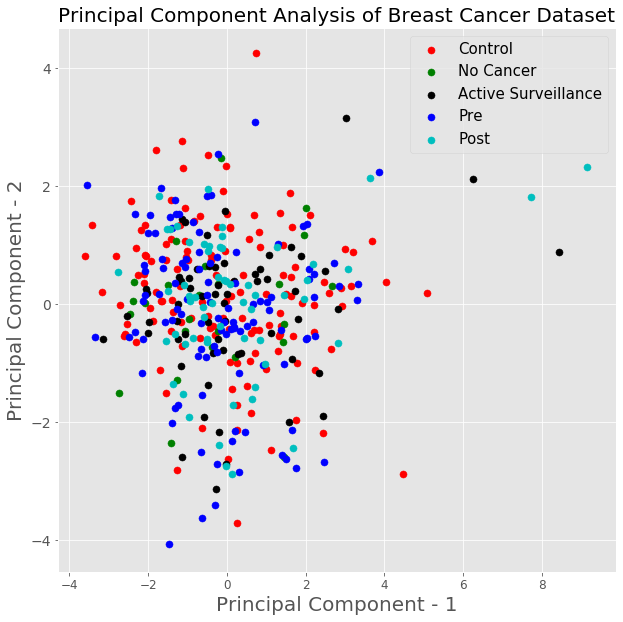

In [32]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Control', 'No Cancer','Active Surveillance','Pre','Post']
colors = ['r', 'g','k','b','c']
for target, color in zip(targets,colors):
    indicesToKeep = data_df['Label'] == target
    plt.scatter(PCA_cancer_df.loc[indicesToKeep, 'principal component 1']
               , PCA_cancer_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Look at their Variance 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualisation # some functions defined for this lab
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [34]:
from sklearn.preprocessing import StandardScaler
x = data_RF.iloc[:]
data_ = StandardScaler().fit_transform(x)
data_ = pd.DataFrame(x,columns = RF_feature)
labels = data.iloc[:,-1]

In [35]:
W, scores, fracs = visualisation.do_pca(data_)
scores = scores/abs(scores).max().max() # Scale the scores by the maximum value in the score matrix

### The "scree plot" below shows variance explained by each principal component

In [36]:
x = np.arange(1,len(fracs)+1)
y = np.cumsum(fracs) # Cumulative sum of elements in the fracs array
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title='Principal component', yaxis_title='Variance explained (cummulative)',
                 xaxis = dict(dtick = 1.0))
fig.show()

### 2D PCA plot

In [37]:
XPC = 'PC2' # Principal component shown on x-axis
YPC = 'PC3' # Principal component shown on y-axis
fig = px.scatter(scores, x=XPC, y=YPC, color = labels, hover_data=[XPC,YPC])
fig.update_traces(mode='markers', marker_line_width=1, marker_size=8)
fig.show()

### 3D PCA plot 

In [38]:
fig = px.scatter_3d(scores, x='PC1', y='PC2', z='PC3', color=labels)
fig.show()

### Plot each feature's contribution to factor loadings in 2D PCA space

In [39]:

fig = visualisation.pca_biplot(W, scores, data, topN=10, XPC='PC2', YPC='PC3')
fig.update_layout(title = {'text':'PCA Contribution',
                          'x':0.5, 'xanchor':'center', 'y':0.98, 'yanchor':'top'},
                  xaxis_title = 'PC2 (Variance = 0.17)',
                  yaxis_title = 'PC3 (Variance = 0.10)',
                  font = dict(size = 24))
fig.show()

In [42]:
feature = 'P05154'
fig = visualisation.pca_biplot(W, scores, data, topN=10, XPC='PC2', YPC='PC3', feature=feature)
fig.update_layout(title = {'text':'PAI3 contribution',
                          'x':0.5, 'xanchor':'center', 'y':0.9, 'yanchor':'top'},
                  xaxis_title = 'PC2 ',
                  yaxis_title = 'PC3 ',
                  font = dict(size = 20))
fig.show()

###### Protein ID: P01375 (Tumour necrosis factor), 

P05154 (PAI3), 

Q9H4G4 (Glipr1), 

P07996 (Thrombospondin-1), 

P07737 (Profillin -1), 

P27169 (PON-1), 

P01019 (Angiotensinogen), 

P02745 (Complement C1q), 

P08185 (Corticosteroid-binding globulin) and 

P19652 (Alpha-1-acid glycoprotein).

P02776 CXCL4